In [1]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [2]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

In [3]:
kghm = pd.read_csv("kgh_d.csv",parse_dates=True,date_format="%d/%m/%Y")
kghm.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,02/01/2015,102.45,102.83,101.97,102.40,309987
1,05/01/2015,102.16,102.88,99.91,100.09,479228
2,07/01/2015,100.53,105.45,99.67,104.89,966372
3,08/01/2015,105.35,107.15,105.35,107.11,711805
4,09/01/2015,107.15,107.15,103.87,104.33,563221


In [4]:
copper = pd.read_csv("ca_c_f_d.csv",parse_dates=True,date_format="%d/%m/%Y")
copper.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,02/01/2015,6309.0,6309.0,6309.0,6309.0
1,05/01/2015,6216.0,6216.0,6216.0,6216.0
2,06/01/2015,6191.0,6191.0,6191.0,6191.0
3,07/01/2015,6170.0,6170.0,6170.0,6170.0
4,08/01/2015,6230.5,6230.5,6230.5,6230.5


In [5]:
copper2 = copper.loc[copper['Data'].isin(kghm['Data'])]
copper2.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,02/01/2015,6309.0,6309.0,6309.0,6309.0
1,05/01/2015,6216.0,6216.0,6216.0,6216.0
3,07/01/2015,6170.0,6170.0,6170.0,6170.0
4,08/01/2015,6230.5,6230.5,6230.5,6230.5
5,09/01/2015,6151.0,6151.0,6151.0,6151.0


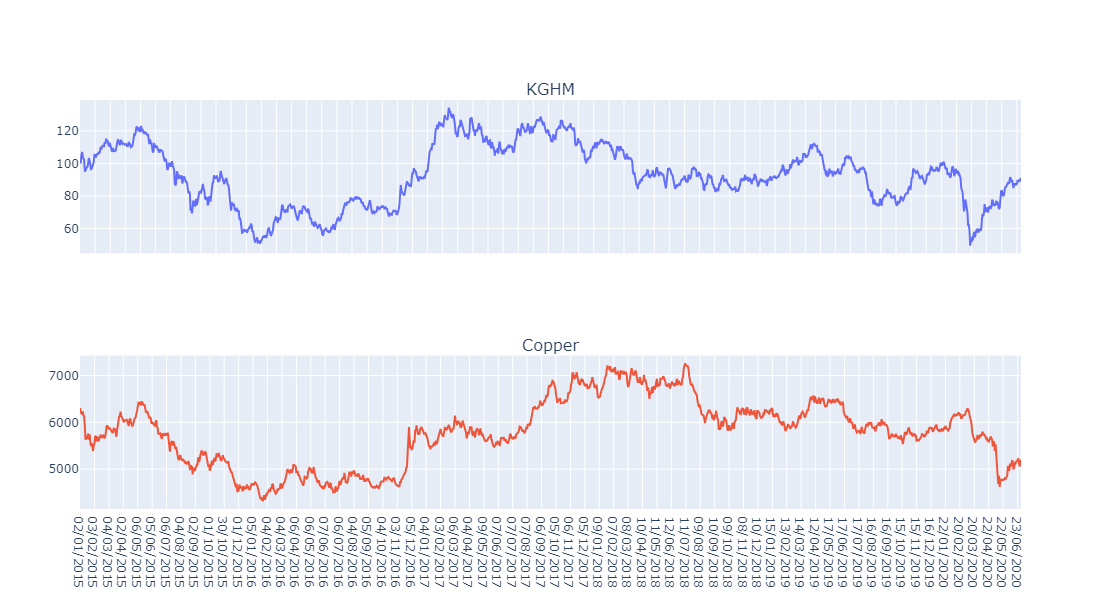

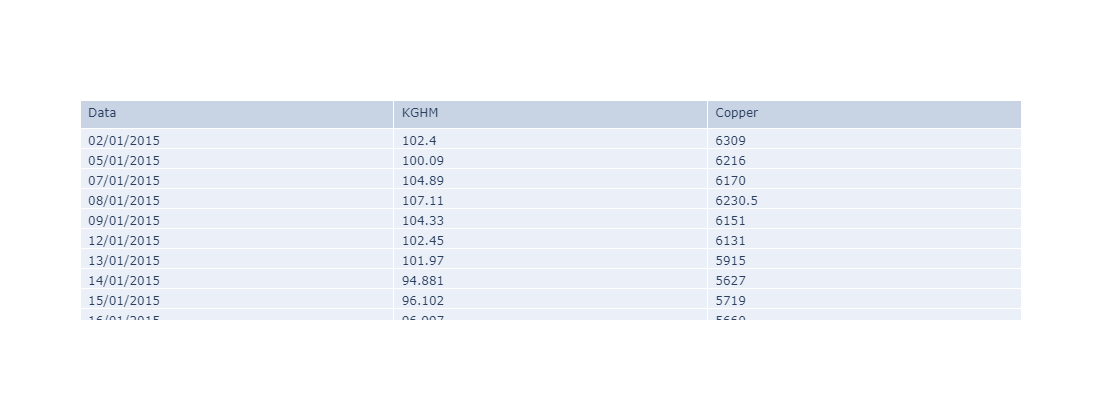

In [49]:
from plotly import subplots
import matplotlib.dates as mdates
fig = go.Figure()
fig = subplots.make_subplots(rows=2,cols=1,subplot_titles=['KGHM','Copper'],shared_xaxes=True)
fig.add_trace(go.Scatter(x=kghm["Data"],y=kghm["Zamkniecie"],name='KGHM Closing Price'),1,1)
fig.add_trace(go.Scatter(x=copper2["Data"],y=copper["Zamkniecie"],name="Copper Closing Price"),2,1)
fig.update_layout(height=600, width=1000,showlegend=False)
fig.show()
fig2 = go.Figure()
fig2.add_trace(go.Table(header=dict(values=['Data', 'KGHM',"Copper"],align='left'),
                       cells=dict(values=[kghm.Data,kghm.Zamkniecie,copper2.Zamkniecie],align='left')))
fig2.update_layout(width=1000, height=400)